In [1]:
import torch
import torch.nn.functional as F
import torchvision
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt


print("Torch: ", torch.__version__)
print("Torchvision: ", torchvision.__version__)

Torch:  2.7.1+cu126
Torchvision:  0.22.1+cu126


In [2]:
transforms = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
train_dataset = torchvision.datasets.MNIST("./data", download=True, train=True, transform=transforms)
test_dataset = torchvision.datasets.MNIST("./data", download=True, train=False, transform=transforms)

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=4)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=4, shuffle=True, num_workers=4)

train_dataset, test_dataset


(Dataset MNIST
     Number of datapoints: 60000
     Root location: ./data
     Split: Train
     StandardTransform
 Transform: Compose(
                ToTensor()
            ),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: ./data
     Split: Test
     StandardTransform
 Transform: Compose(
                ToTensor()
            ))

shape of image: torch.Size([4, 1, 28, 28])
shape of label: torch.Size([4])


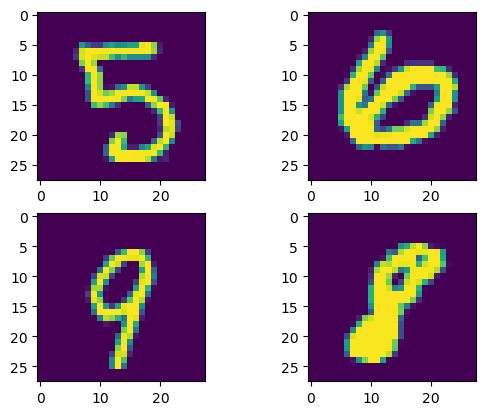

In [4]:
plt.figure(1)
for x, y in train_dataloader:
    print("shape of image:", x.shape)
    print("shape of label:", y.shape)
    for i in range(x.size(0)):
        plt.subplot(221 + i)
        plt.imshow(x[i].permute(1, 2, 0))
    break

In [5]:
class CNNClassifier(torch.nn.Module):
    def __init__(self):
        super(CNNClassifier, self).__init__()
        self.c1 = torch.nn.Conv2d(1, 32, kernel_size=3)
        self.c2 = torch.nn.Conv2d(32, 64, kernel_size=3)
        self.c3 = torch.nn.Conv2d(64, 128, kernel_size=3)
        self.c4 = torch.nn.Conv2d(128, 256, kernel_size=3)
        self.fproj = torch.nn.Linear(in_features=102400, out_features=10)  # final projection
    def forward(self, x):
        x = F.relu(self.c1(x))
        x = F.relu(self.c2(x))
        x = F.relu(self.c3(x))
        x = F.relu(self.c4(x))
        x = x.view(x.size(0), -1)  # flatten
        return self.fproj(x)

class ResnetClassifier(torch.nn.Module):
    def __init__():
        pass
    def forward():
        pass

class RNNClassifier(torch.nn.Module):
    def __init__():
        pass
    def forward():
        pass

class LSTMClassifier(torch.nn.Module):
    def __init__():
        pass
    def forward():
        pass

class GRUClassifier(torch.nn.Module):
    def __init__():
        pass
    def forward():
        pass

class TransformerClassifier(torch.nn.Module):
    def __init__():
        pass
    def forward():
        pass

class GraphClassifier(torch.nn.Module):
    def __init__():
        pass
    def forward():
        pass

In [6]:
model = CNNClassifier()
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)

loss = 0
for x, y in tqdm(train_dataloader):
    optimizer.zero_grad()  # Reset gradients
    res = model(x)
    loss = F.cross_entropy(res, y)
    loss.backward()
    optimizer.step()  # Update weights

print("final loss:", loss.item())

  0%|          | 0/15000 [00:00<?, ?it/s]

final loss: 0.005205871537327766


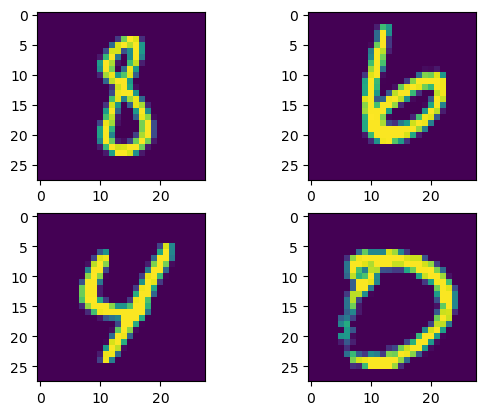

tensor([8, 6, 4, 0])


In [18]:
plt.figure(1)
with torch.no_grad():
    for x, y in test_dataloader:
        for i in range(x.size(0)):
            plt.subplot(221 + i)
            plt.imshow(x[i].permute(1, 2, 0))        
        plt.show()
        logit = model(x)
        output = F.softmax(logit, dim=-1)
        predicted_label = torch.argmax(output, dim=-1)
        print(predicted_label)
        break